In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 100)  
pd.set_option('display.max_columns', 100) 

# loading the dataset


In [3]:
titanic = pd.read_csv("D:\downloads\Titanic-Dataset.csv")
titanic.head(5)
titanic.tail(5)
titanic.sample(5)

PassengerId  Survived  Pclass  \
72            73         0       2   
431          432         1       3   
18            19         0       3   
365          366         0       3   
323          324         1       2   

                                                  Name     Sex   Age  SibSp  \
72                                Hood, Mr. Ambrose Jr    male  21.0      0   
431  Thorneycroft, Mrs. Percival (Florence Kate White)  female   NaN      1   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
365                     Adahl, Mr. Mauritz Nils Martin    male  30.0      0   
323  Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...  female  22.0      1   

     Parch        Ticket   Fare Cabin Embarked  
72       0  S.O.C. 14879  73.50   NaN        S  
431      0        376564  16.10   NaN        S  
18       0        345763  18.00   NaN        S  
365      0        C 7076   7.25   NaN        S  
323      1        248738  29.00   NaN        S

In [4]:
titanic.sort_values(by='Name',ascending=False, inplace=True)
titanic = titanic.sort_values(by='Name',ascending=False)

In [5]:
titanic.shape

(891, 12)

# data preprocessing and data cleaning


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 868 to 845
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [7]:
titanic.dtypes #checking for datatype

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
titanic.duplicated().sum()  #checking fo duplicate values

0

In [9]:
#treating null values
nv = titanic.isna().sum().sort_values(ascending=False)
nv = nv[nv>0]
nv

Cabin       687
Age         177
Embarked      2
dtype: int64

In [10]:
# Cheecking what percentage column contain missing values
titanic.isnull().sum().sort_values(ascending=False)*100/len(titanic)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [11]:
# Since Cabin Column has more than 75 % null values .So , we will drop this column
titanic.drop(columns = 'Cabin', axis = 1, inplace = True)
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [12]:
# Filling Null Values in Age column with mean values of age column
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

# filling null values in Embarked Column with mode values of embarked column
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)

In [13]:
# checking for null values
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
# Finding no. of unique values in each column of dataset
titanic[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']].nunique().sort_values()

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             89
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

categorising the data

In [16]:
for i in ['Sex','Embarked']:
    print(i)
    display(titanic[i].value_counts().to_frame())

Sex


Sex
male    577
female  314

Embarked


Embarked
S       646
C       168
Q        77

In [17]:
for i in ['Sex','Embarked']:
    print(i)
    display(titanic[i].value_counts(normalize=True).to_frame())

Sex


Sex
male    0.647587
female  0.352413

Embarked


Embarked
S  0.725028
C  0.188552
Q  0.086420

In [18]:
titanic.Sex.value_counts(normalize=True).to_frame()

Sex
male    0.647587
female  0.352413

In [19]:
titanic.select_dtypes(include='object').describe()

Name   Sex  Ticket Embarked
count                           891   891     891      891
unique                          891     2     681        3
top     van Melkebeke, Mr. Philemon  male  347082        S
freq                              1   577       7      646

In [20]:
#titanic.select_dtypes(include='object').describe().transpose()
titanic.select_dtypes(include='object').describe().T

count unique                          top freq
Name       891    891  van Melkebeke, Mr. Philemon    1
Sex        891      2                         male  577
Ticket     891    681                       347082    7
Embarked   891      3                            S  646

Dropping Unnecessary columns

In [22]:
titanic.drop(columns=['PassengerId','Name','Ticket'],axis=1,inplace=True)
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [23]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 868 to 845
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [24]:
titanic.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.002015    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   29.699118    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [25]:
# showing info. about categorical columns
titanic.describe(include='O')

Sex Embarked
count    891      891
unique     2        3
top     male        S
freq     577      646

# Data visualization

In [26]:
d1 = titanic['Sex'].value_counts()
d1

male      577
female    314
Name: Sex, dtype: int64

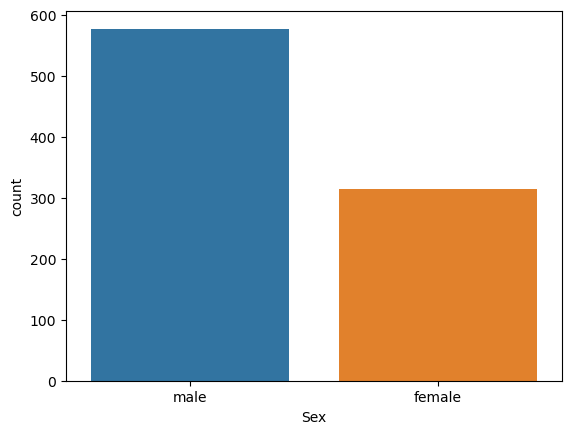

In [29]:
# Plotting Count plot for sex column
sns.countplot(x=titanic['Sex'])
plt.show()

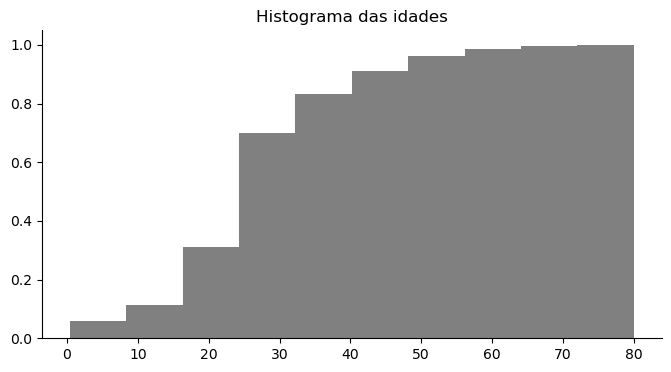

In [30]:
#histogram for age
plt.figure(figsize=(8,4))

plt.hist(x=titanic.Age, color= 'gray', density= True, cumulative=True)

plt.title('Histograma das idades')
plt.grid(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()

In [31]:
import plotly.express as px

In [32]:
fig = px.histogram(data_frame=titanic, 
                   x='Age',
                  color='Survived',
                  title = "Histograma",
                  #barnorm='fraction',
                  histnorm = 'probability')
fig.show()

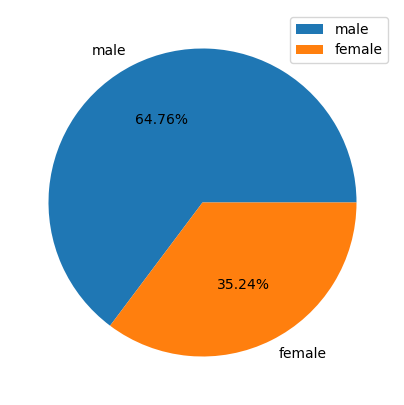

In [33]:
# Plotting Percantage Distribution of Sex Column
plt.figure(figsize=(5,5))
plt.pie(d1.values,labels=d1.index,autopct='%.2f%%')
plt.legend()
plt.show()

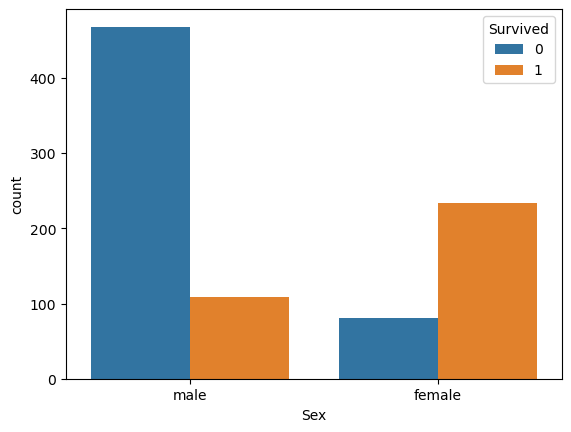

In [34]:
# Showing Distribution of Sex Column Survived Wise
sns.countplot(x=titanic['Sex'],hue=titanic['Survived']) # In Sex (0 represents female and 1 represents male)
plt.show()

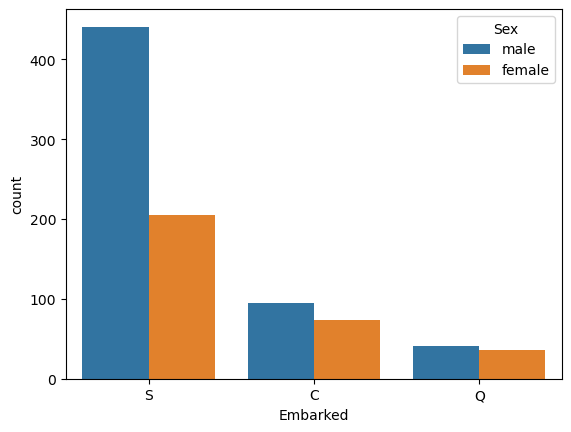

In [35]:
# Showing Distribution of Embarked Sex wise
sns.countplot(x=titanic['Embarked'],hue=titanic['Sex'])
plt.show()

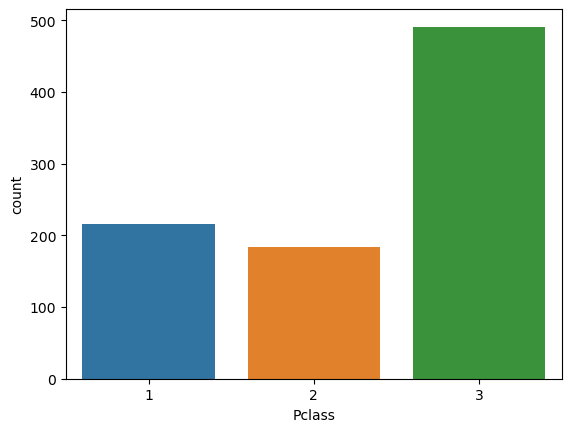

In [36]:
# Plotting CountPlot for Pclass Column
sns.countplot(x=titanic['Pclass'])
plt.show()

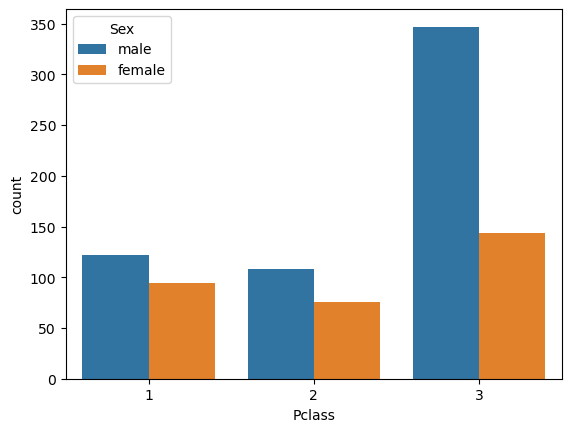

In [37]:
# Showing Distribution of Pclass Sex wise
sns.countplot(x=titanic['Pclass'],hue=titanic['Sex'])
plt.show()

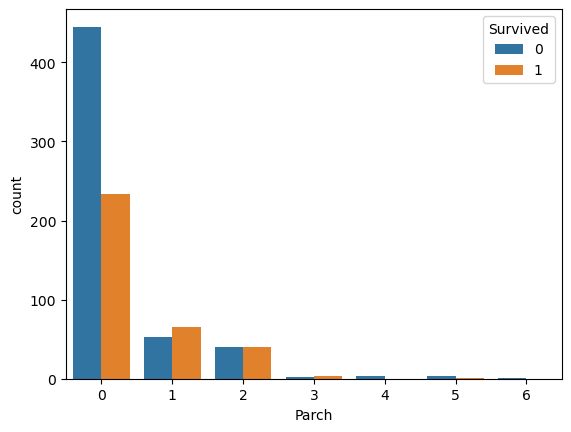

In [38]:
# Showing Distribution of Parch Survived Wise
sns.countplot(x=titanic['Parch'],hue=titanic['Survived'])
plt.show()

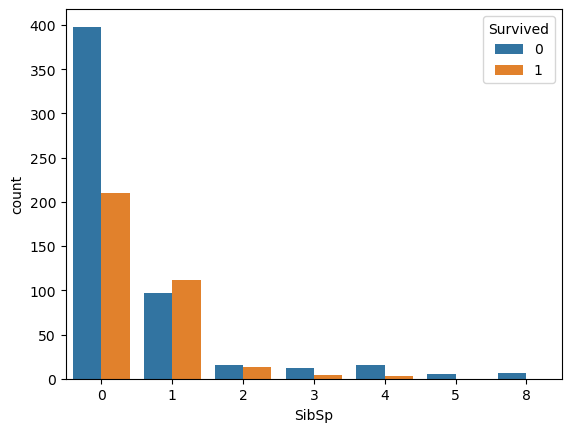

In [39]:
# Showing Distribution of SibSp Survived Wise
sns.countplot(x=titanic['SibSp'],hue=titanic['Survived'])
plt.show()

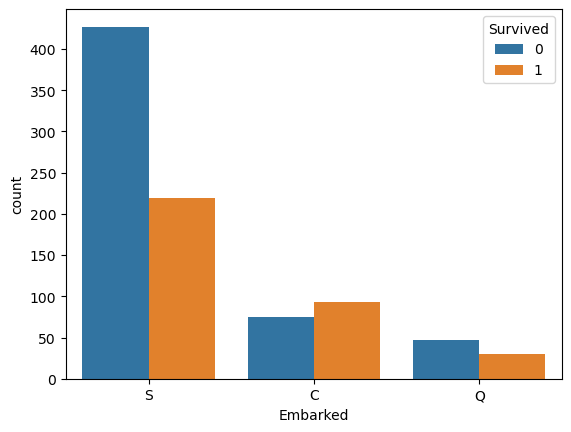

In [40]:
# Showing Distribution of Embarked Survived wise
sns.countplot(x=titanic['Embarked'],hue=titanic['Survived'])
plt.show()

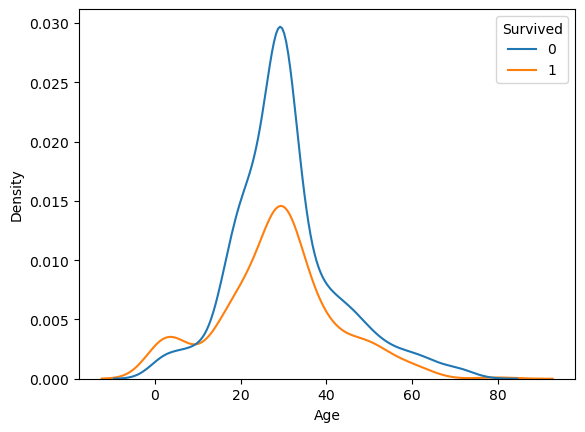

In [46]:
# Showing Distribution of Age Survived Wise
sns.kdeplot(x=titanic['Age'],hue=titanic['Survived'])
plt.show()

<Axes: ylabel='Age'>

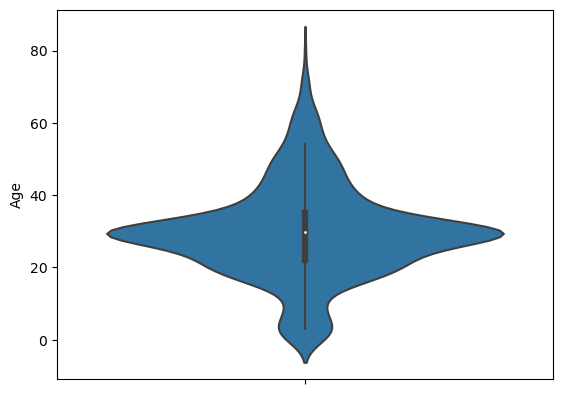

In [43]:
sns.violinplot(data=titanic, y='Age') # violinplot - useful for displaying the distribution and density of a dataset across different categories or groups.

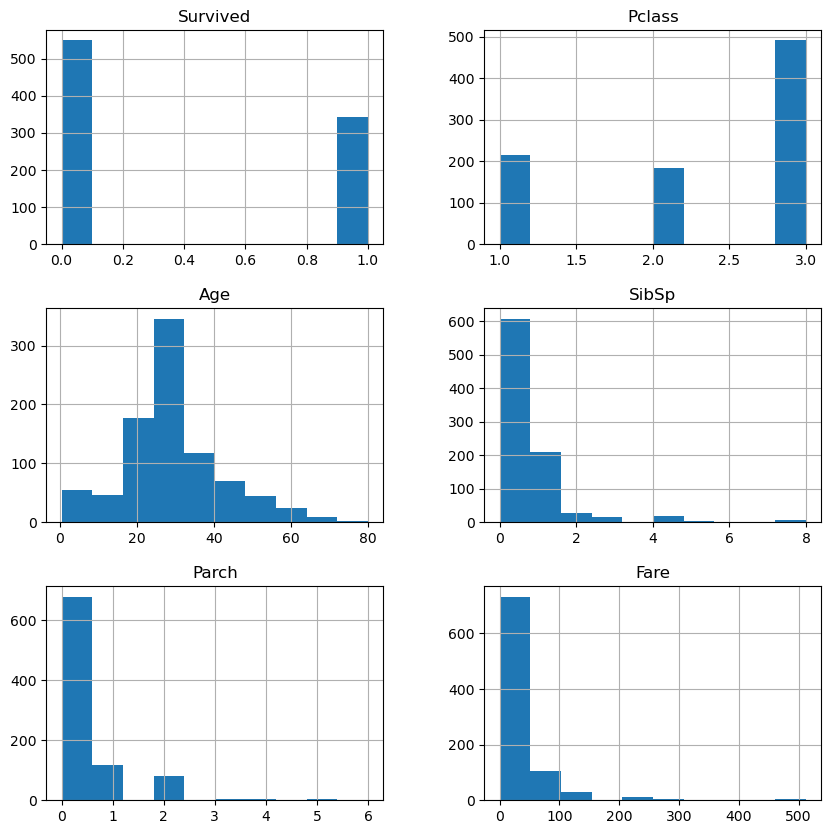

In [44]:
# Plotting Histplot for Dataset,
titanic.hist(figsize=(10,10))
plt.show()

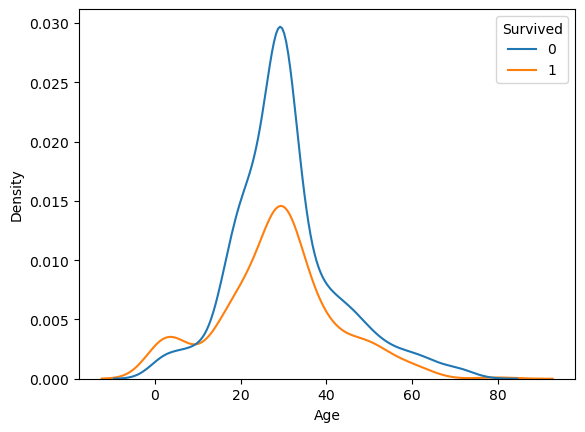

In [45]:
# Showing Distribution of Age Survived Wise
sns.kdeplot(x=titanic['Age'],hue=titanic['Survived'])
plt.show()

the above graph tells us that people in the  age group between 20-40 are died

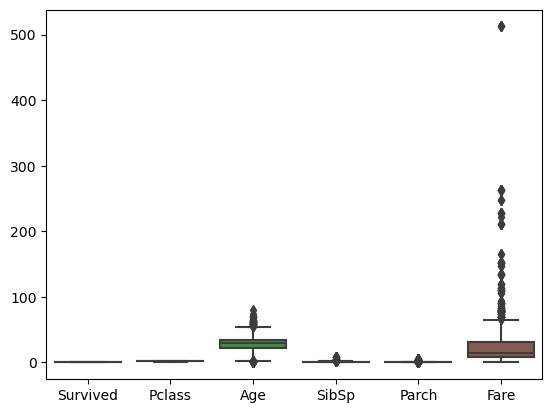

In [47]:
# Plotting Boxplot for dataset
# Checking for outliers
sns.boxplot(titanic)
plt.show()

This Plot shows the Outliers present in 2 columns i.e.. Age and Fare.

In [48]:
# showing Correlation
titanic.corr()

Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.069809 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.331339  0.083081  0.018443 -0.549500
Age      -0.069809 -0.331339  1.000000 -0.232625 -0.179191  0.091566
SibSp    -0.035322  0.083081 -0.232625  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.179191  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.091566  0.159651  0.216225  1.000000

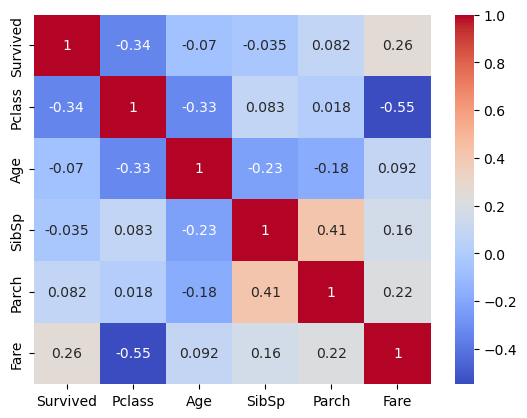

In [49]:
# Showing Correlation Plot
sns.heatmap(titanic.corr(),annot=True,cmap='coolwarm')
plt.show()

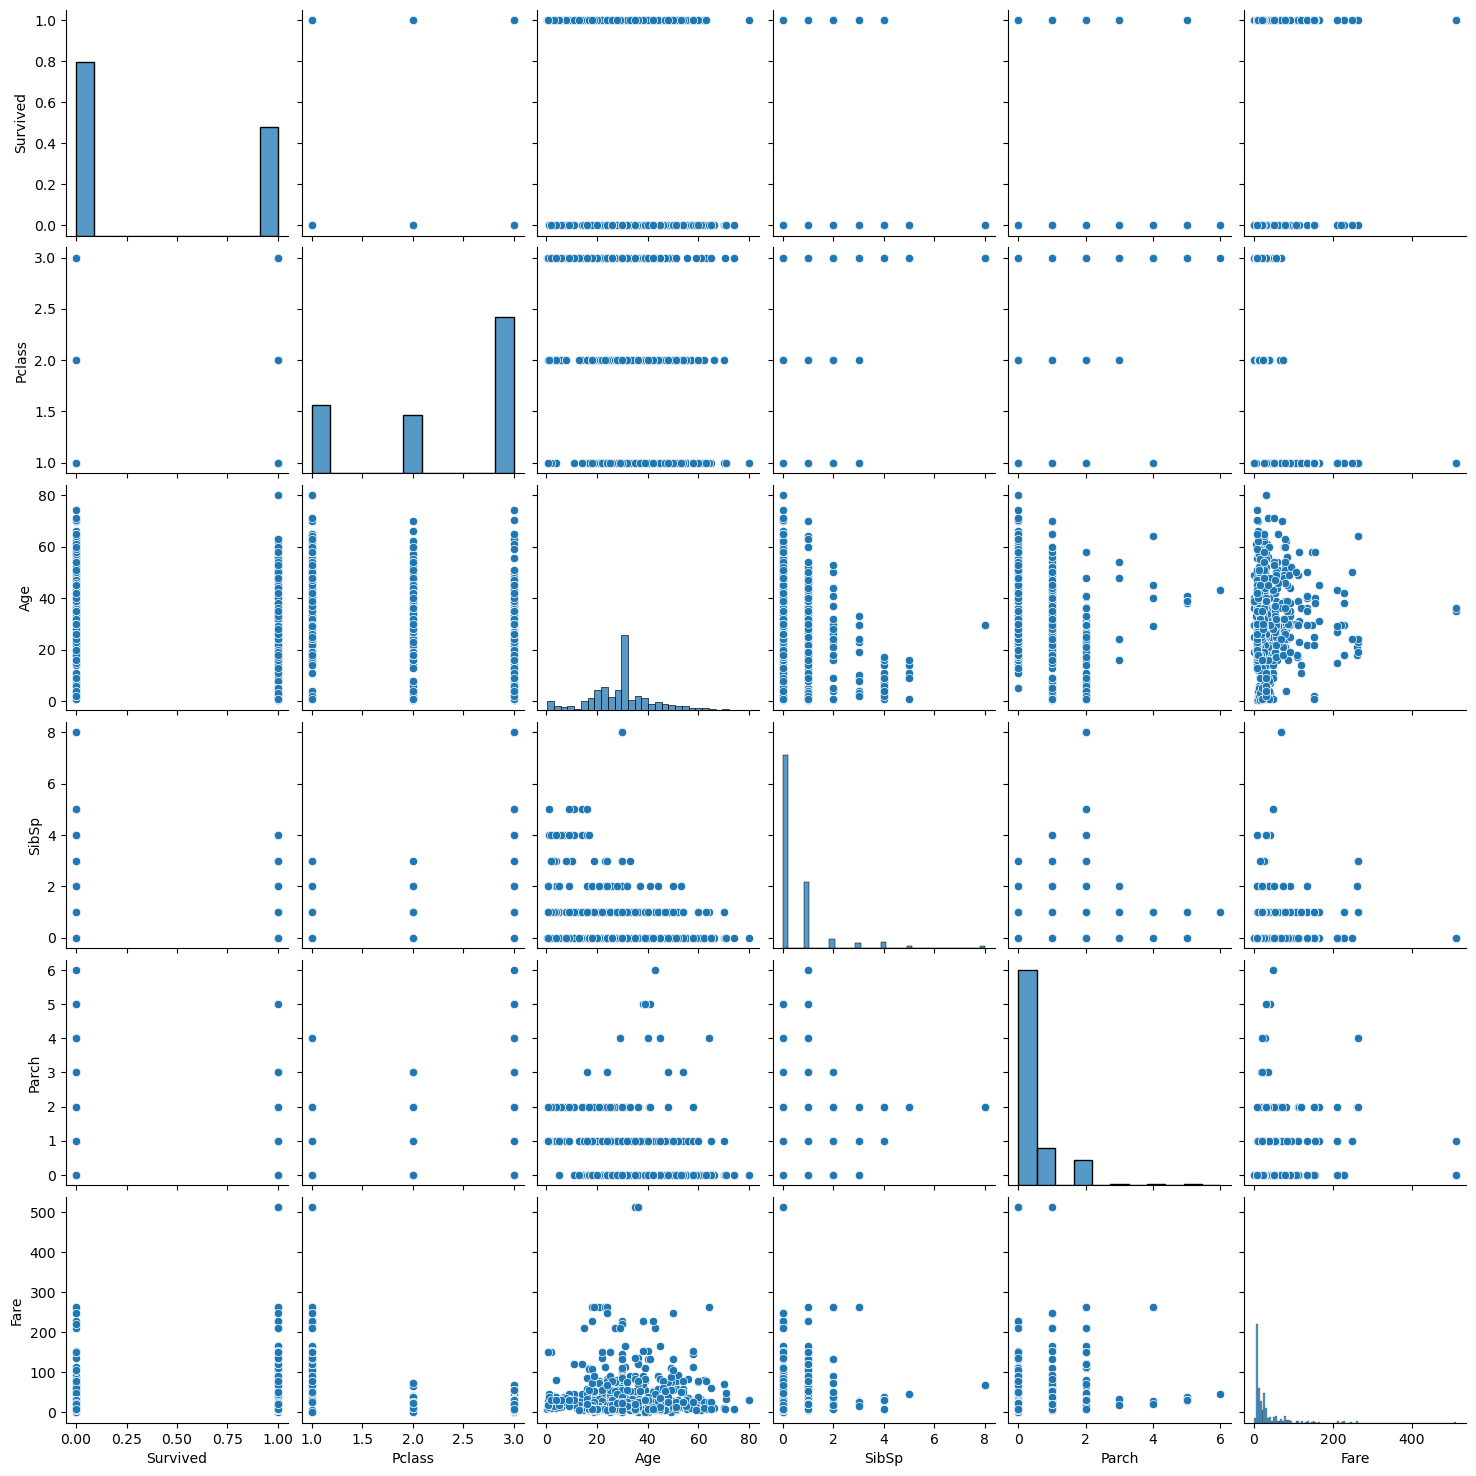

In [50]:
# Plotting pairplot - displays pairwise relationships between different variables in a dataset. It is particularly useful for understanding the interactions and correlations between multiple variables simultaneously
sns.pairplot(titanic)
plt.show()

Label encoding

In [51]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
le = LabelEncoder()

# Apply label encoding to each categorical column
for column in ['Sex','Embarked']:
    titanic[column] = le.fit_transform(titanic[column])

titanic.head()

# Sex Column

# 0 represents female
# 1 represents Male

# Embarked Column

# 0 represents C
# 1 represents Q
# 2 represents S

Survived  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
868         0       3    1  29.699118      0      0   9.5000         2
153         0       3    1  40.500000      0      2  14.5000         2
361         0       2    1  29.000000      1      0  27.7208         0
282         0       3    1  16.000000      0      0   9.5000         2
286         1       3    1  30.000000      0      0   9.5000         2

# Data Modelling

In [52]:
# importing libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [53]:
#selecting independent and dependent features
cols = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
x = titanic[cols]
y = titanic['Survived']
print(x.shape)
print(y.shape)
print(type(x))  # DataFrame
print(type(y))  # Series

(891, 7)
(891,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [54]:
x.head()

Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
868       3    1  29.699118      0      0   9.5000         2
153       3    1  40.500000      0      2  14.5000         2
361       2    1  29.000000      1      0  27.7208         0
282       3    1  16.000000      0      0   9.5000         2
286       3    1  30.000000      0      0   9.5000         2

In [55]:
y.head()

868    0
153    0
361    0
282    0
286    1
Name: Survived, dtype: int64

In [56]:
print(891*0.10)

89.10000000000001


In [57]:
#Train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(801, 7)
(90, 7)
(801,)
(90,)


Creating Functions to compute Confusion Matrix, Classification Report and to generate Training and the Testing Score(Accuracy)

In [58]:
def cls_eval(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(ytest,ypred))

def mscore(model):
    print('Training Score',model.score(x_train,y_train))  # Training Accuracy
    print('Testing Score',model.score(x_test,y_test))     # Testing Accuracy

# 1. logestic Regression

In [59]:
# Building the logistic Regression Model
lr = LogisticRegression(max_iter=1000,solver='liblinear')
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [60]:
# Computing Training and Testing score
mscore(lr)

Training Score 0.8127340823970037
Testing Score 0.7555555555555555


In [61]:
# Generating Prediction
ypred_lr = lr.predict(x_test)
print(ypred_lr)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0]


In [62]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_lr)
acc_lr = accuracy_score(y_test,ypred_lr)
print('Accuracy Score',acc_lr)

Confusion Matrix
 [[49  7]
 [15 19]]
Classification Report
               precision    recall  f1-score   support

           0       0.77      0.88      0.82        56
           1       0.73      0.56      0.63        34

    accuracy                           0.76        90
   macro avg       0.75      0.72      0.73        90
weighted avg       0.75      0.76      0.75        90

Accuracy Score 0.7555555555555555


# 2.KNN Classifier

In [63]:
# Building the knnClassifier Model
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [64]:
# Computing Training and Testing score
mscore(knn)

Training Score 0.7765293383270911
Testing Score 0.6555555555555556


In [65]:
# Generating Prediction
ypred_knn = knn.predict(x_test)
print(ypred_knn)

[0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1]


In [66]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_knn)
acc_knn = accuracy_score(y_test,ypred_knn)
print('Accuracy Score',acc_knn)

Confusion Matrix
 [[45 11]
 [20 14]]
Classification Report
               precision    recall  f1-score   support

           0       0.69      0.80      0.74        56
           1       0.56      0.41      0.47        34

    accuracy                           0.66        90
   macro avg       0.63      0.61      0.61        90
weighted avg       0.64      0.66      0.64        90

Accuracy Score 0.6555555555555556


# 3.SVC

In [67]:
# Building Support Vector Classifier Model
svc = SVC(C=1.0)
svc.fit(x_train, y_train)

SVC()

In [68]:
# Computing Training and Testing score
mscore(svc)

Training Score 0.686641697877653
Testing Score 0.6333333333333333


In [69]:
# Generating Prediction
ypred_svc = svc.predict(x_test)
print(ypred_svc)

[0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1]


In [70]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_svc)
acc_svc = accuracy_score(y_test,ypred_svc)
print('Accuracy Score',acc_svc)

Confusion Matrix
 [[50  6]
 [27  7]]
Classification Report
               precision    recall  f1-score   support

           0       0.65      0.89      0.75        56
           1       0.54      0.21      0.30        34

    accuracy                           0.63        90
   macro avg       0.59      0.55      0.52        90
weighted avg       0.61      0.63      0.58        90

Accuracy Score 0.6333333333333333


# 4. Random Forest Classifier

In [71]:
# Building the RandomForest Classifier Model
rfc=RandomForestClassifier(n_estimators=80,criterion='entropy',min_samples_split=5,max_depth=10)
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       n_estimators=80)

In [72]:
# Computing Training and Testing score
mscore(rfc)

Training Score 0.9288389513108615
Testing Score 0.7666666666666667


In [73]:
# Generating Prediction
ypred_rfc = rfc.predict(x_test)
print(ypred_rfc)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0
 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 0]


In [74]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_rfc)
acc_rfc = accuracy_score(y_test,ypred_rfc)
print('Accuracy Score',acc_rfc)

Confusion Matrix
 [[50  6]
 [15 19]]
Classification Report
               precision    recall  f1-score   support

           0       0.77      0.89      0.83        56
           1       0.76      0.56      0.64        34

    accuracy                           0.77        90
   macro avg       0.76      0.73      0.74        90
weighted avg       0.77      0.77      0.76        90

Accuracy Score 0.7666666666666667


# 5. Decision Tree Classifier

In [75]:
# Building the DecisionTree Classifier Model
dt = DecisionTreeClassifier(max_depth=5,criterion='entropy',min_samples_split=10)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

In [76]:
# Computing Training and Testing score
mscore(dt)

Training Score 0.8514357053682896
Testing Score 0.7777777777777778


In [77]:
# Generating Prediction
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 0]


In [78]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_dt)
acc_dt = accuracy_score(y_test,ypred_dt)
print('Accuracy Score',acc_dt)

Confusion Matrix
 [[53  3]
 [17 17]]
Classification Report
               precision    recall  f1-score   support

           0       0.76      0.95      0.84        56
           1       0.85      0.50      0.63        34

    accuracy                           0.78        90
   macro avg       0.80      0.72      0.74        90
weighted avg       0.79      0.78      0.76        90

Accuracy Score 0.7777777777777778


# 6.Adaboost Classifier

In [79]:
# Builing the Adaboost model
ada_boost  = AdaBoostClassifier(n_estimators=80)
ada_boost.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=80)

In [80]:
# Computing the Training and Testing Score
mscore(ada_boost)

Training Score 0.846441947565543
Testing Score 0.7111111111111111


In [81]:
# Generating the predictions
ypred_ada_boost = ada_boost.predict(x_test)

In [82]:
# Evaluate the model - confusion matrix, classification Report, Accuracy Score
cls_eval(y_test,ypred_ada_boost)
acc_adab = accuracy_score(y_test,ypred_ada_boost)
print('Accuracy Score',acc_adab)

Confusion Matrix
 [[45 11]
 [15 19]]
Classification Report
               precision    recall  f1-score   support

           0       0.75      0.80      0.78        56
           1       0.63      0.56      0.59        34

    accuracy                           0.71        90
   macro avg       0.69      0.68      0.68        90
weighted avg       0.71      0.71      0.71        90

Accuracy Score 0.7111111111111111


In [83]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','knn','SVC','Random Forest Classifier','Decision Tree Classifier','Ada Boost Classifier'],
    'Score': [acc_lr,acc_knn,acc_svc,acc_rfc,acc_dt,acc_adab]})

models.sort_values(by = 'Score', ascending = False)

Model     Score
4  Decision Tree Classifier  0.777778
3  Random Forest Classifier  0.766667
0       Logistic Regression  0.755556
5      Ada Boost Classifier  0.711111
1                       knn  0.655556
2                       SVC  0.633333

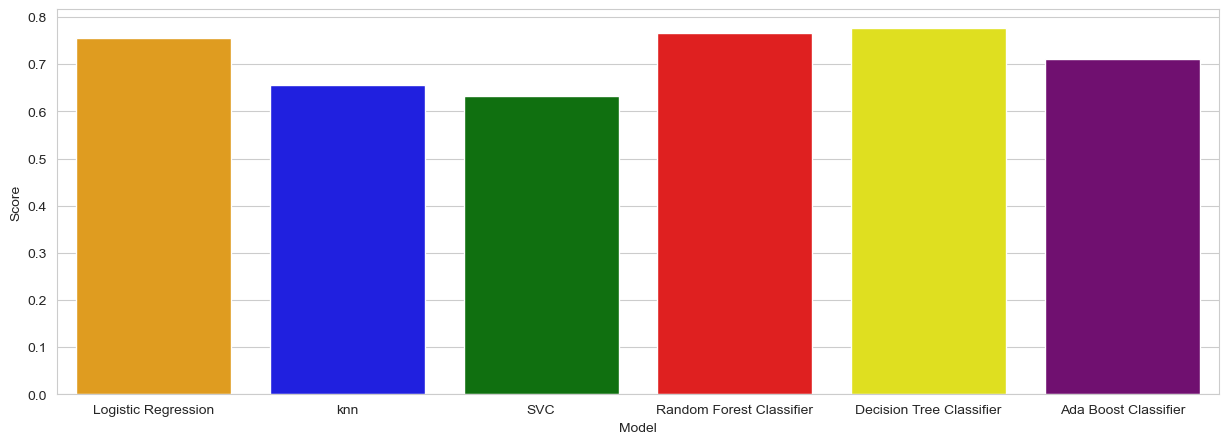

In [84]:
colors = ["orange","blue", "green", "red", "yellow","purple"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

From the above graph it is clear that DecisionTree Classifier model provides the Highest Accuracy